# subplot과 subplots 모두 한번에 여러 그래프를 보여주기 위해 사용되는 코드. 

(코드는 다르지만 출력값은 같다.) 
~~~
subplot: 일일이 다 설정
subplots: 한번에 설정. 
(만약 100개의 그래프를 그린다 치면 subplot는 비효율적이라 쓰기 힘들 것이다.) 

한 번에 여러개의 그래프를 그리려면 plt.subplots(행, 열) 를 이용.
plt.subplots(행, 열) 은 2개의 변수를 반환하는데, 하나는 전체 액자 figure에 대한 변수고, 다른 하나는 액자 내 여러 개의 액자에 대한 리스트 axs다.

출처: https://dailyheumsi.tistory.com/36 [하나씩 점을 찍어 나가며]
~~~

In [9]:
import matplotlib.pyplot as plt
import numpy as np

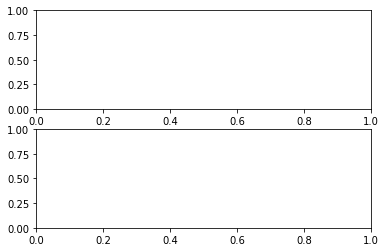

In [10]:
# subplot: 그래프 틀 생성하기
plt.subplot(2,1,1)   #
plt.subplot(2,1,2)
plt.show()

**그래프 여러개 그리기**

In [ ]:
fig, ax = plt.subplots(1, 3)
plt.show()

'''
각 액자에 그래프를 그리려면 다음과 같이 plt.plot() 이 아니라, ax[i].plot() 을 사용하면 된다.
ax 는 리스트로, ax[0], ax[1] .. 에 각 액자를 하나씩 담고있다
'''

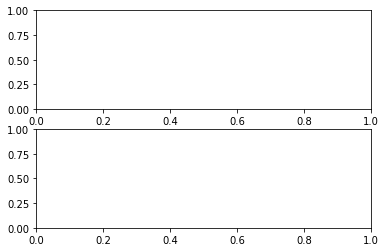

In [11]:
# subplots의 예
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.show()

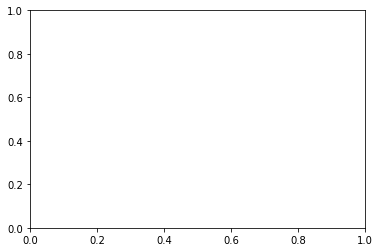

In [12]:
fig, ax = plt.subplots()   #이런 형태의 모습을 자주 볼수있다

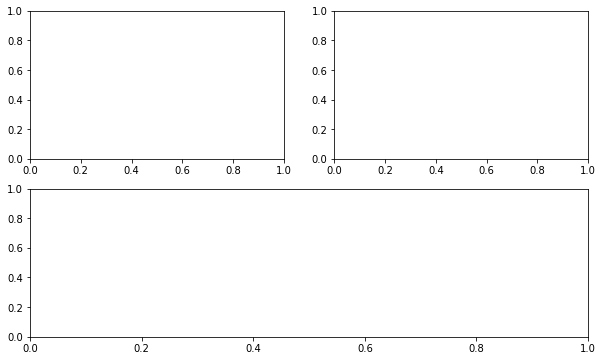

In [13]:
plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

plt.show()

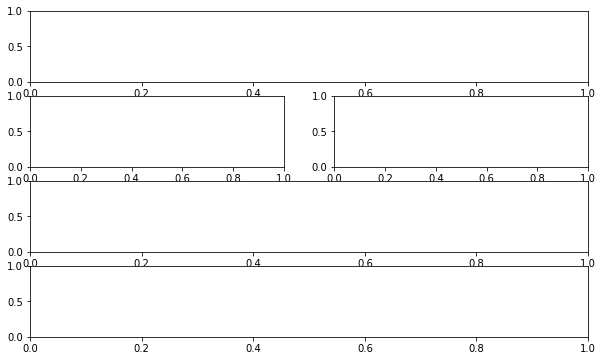

In [14]:
plt.figure(figsize=(10, 6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()

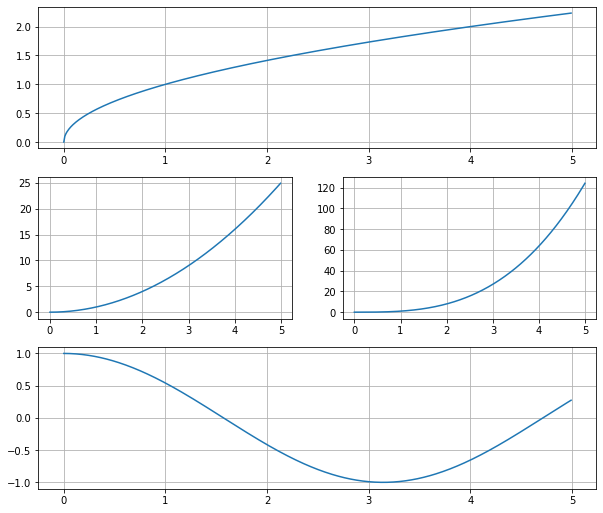

In [20]:
t=np.arange(0, 5, 0.01)           # 0~5 사이 숫자들이 0.01 단위로 증가한다

plt.figure(figsize=(10,12))

plt.subplot(411)                  # 
plt.plot(t, np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t, t**2)
plt.grid()

plt.subplot(424)
plt.plot(t, t**3)
plt.grid()

plt.subplot(413)
plt.plot(t, np.cos(t))
plt.grid()

plt.show()

subplots()에선 두개의 값을 받을 수 있는데 figure 와 axes 값을 받을 수 있다. 여기서 변수명은 상관없다. 순서가 중요하다
                           
fig란 figure로써 - 전체 subplot을 말한다. ex) 서브플로안에 몇개의 그래프가 있던지 상관없이  그걸 담는 하나. 전체 사이즈를 말한다.

ax는 axe로써 - 전체 중 낱낱개를 말한다 ex) 서브플롯 안에 2개(a1,a2)의 그래프가 있다면 a1, a2 를 일컬음 (그래서 두번째 변수에 index로 각 그래프를 호출함)

출력창을 보면  첫째줄이 fig의 값을 나타내고  / 두번째가 ax를 나타내는데 해당 subplot은 plt.subplots(nrows=2, ncols=1) 으로 2개의 그래프를 보여주기에 2개로 나누어진다.

반대로 subplot() 경우에서는 sublplot()는 axes만 받을 수 있다. (당연히 subplot은 부분을 지시하는 키워드이기에) 

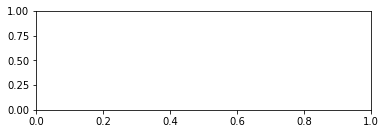

In [16]:
ax = plt.subplot(2,1,1) #subplot은 하나의 값(axes)만 받을 수 있다.

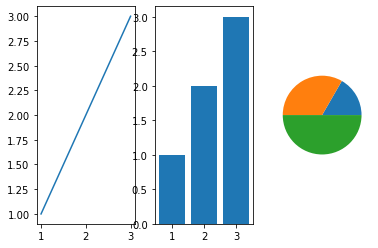

In [21]:
# 1행 3열로 액자들을 그린다. 
fig, ax = plt.subplots(1, 3) # 각 액자들에 그래프를 그린다. 

ax[0].plot([1,2,3],[1,2,3], ) 
ax[1].bar([1,2,3],[1,2,3]) 
ax[2].pie([1,2,3]) 

plt.show()

https://frhyme.github.io/python-lib/subplot/

plt.figure나 plt.axe나 별 차이 없다고 생각하면 됩니다. 원래는 plt.scatter로 그림을 그려줬다면, 지금은 axe.scatter라는 것이 차이라고 할 수 있겠네요.
단, 가능하면 set_title을 통해서 해당 axe가 무엇인지 설명해주는 것이 포함되면 좋겠습니다.

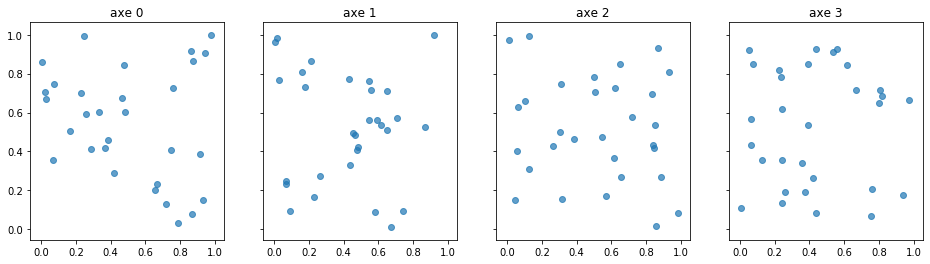

In [17]:
f, axes = plt.subplots(1, 4, sharex=True, sharey=True)
"""figure의 크기를 조정, 원래 하던 방식인 f.figsize=(16, 4)로는 낫 워킹. 
"""
f.set_size_inches((16, 4)) 

for i in range(0, 4):
    axes[i].scatter(np.random.random(30), np.random.random(30), alpha=0.7)
    axes[i].set_title("axe {}".format(i))
    
#plt.savefig('../../assets/images/markdown_img/pl_subplot_180515.svg')
plt.show()

In [18]:
from gensim.models.word2vec import Word2Vec

"""
3차원으로 변경하여 보여주는 것도 괜찮을 것 같은데 흠. 
"""

f, axes = plt.subplots(2, 2, sharex=False, sharey=False)
f.set_size_inches((16, 6)) 
for i in range(0, 2):
    for j in range(0, 2):
        sample_n = [1, 100, 500, 1000][i*2+j]
        sent_lst = ["I am a boy", "I am a girl", "I am a dog"]*sample_n
        sent_split_lst = map(lambda s: list(s.lower().split(" ")), sent_lst)

        model = Word2Vec(list(sent_split_lst), size=2, window = 3, min_count=1)
        model.init_sims(replace=True)        # 학습 완료 후, 필요없는 메모리 삭제 

        for x, y, t in ((model.wv.get_vector(w)[0], model.wv.get_vector(w)[0], w) for w in model.wv.index2entity):
            axes[i][j].scatter(x, y, cmap=plt.cm.rainbow)
            axes[i][j].text(x+0.01, y, t, fontsize=12)
            axes[i][j].set_title("sample size = {}".format(sample_n))
            
f.tight_layout()       # 그냥 이걸로 다 해결되었다.
#plt.savefig('../../assets/images/markdown_img/word_embedding_subplot_20180515.svg')
plt.show()

ModuleNotFoundError: No module named 'gensim'